8.2.3 연습문제 

In [30]:
#8.2.3 연습문제 
#1. 표본 갯수가 10개인 경우 
rv = sp.stats.binom(5,0.5)
pmf = rv.pmf(np.arange(6)) #확률질량함수

sample_1 = rv.rvs(10, random_state=0) #표본 시뮬레이션
sample_p = np.bincount(sample_1, minlength=6)/float(len(sample_1)) #표본확률분포

df = pd.DataFrame({
    '이론' : pmf,
    '시뮬레이션' : sample_p
},index=np.arange(6))
df

,이론,시뮬레이션
0,0.03125,0.0
1,0.15625,0.0
2,0.31250,0.3
3,0.31250,0.5
4,0.15625,0.2
5,0.03125,0.0


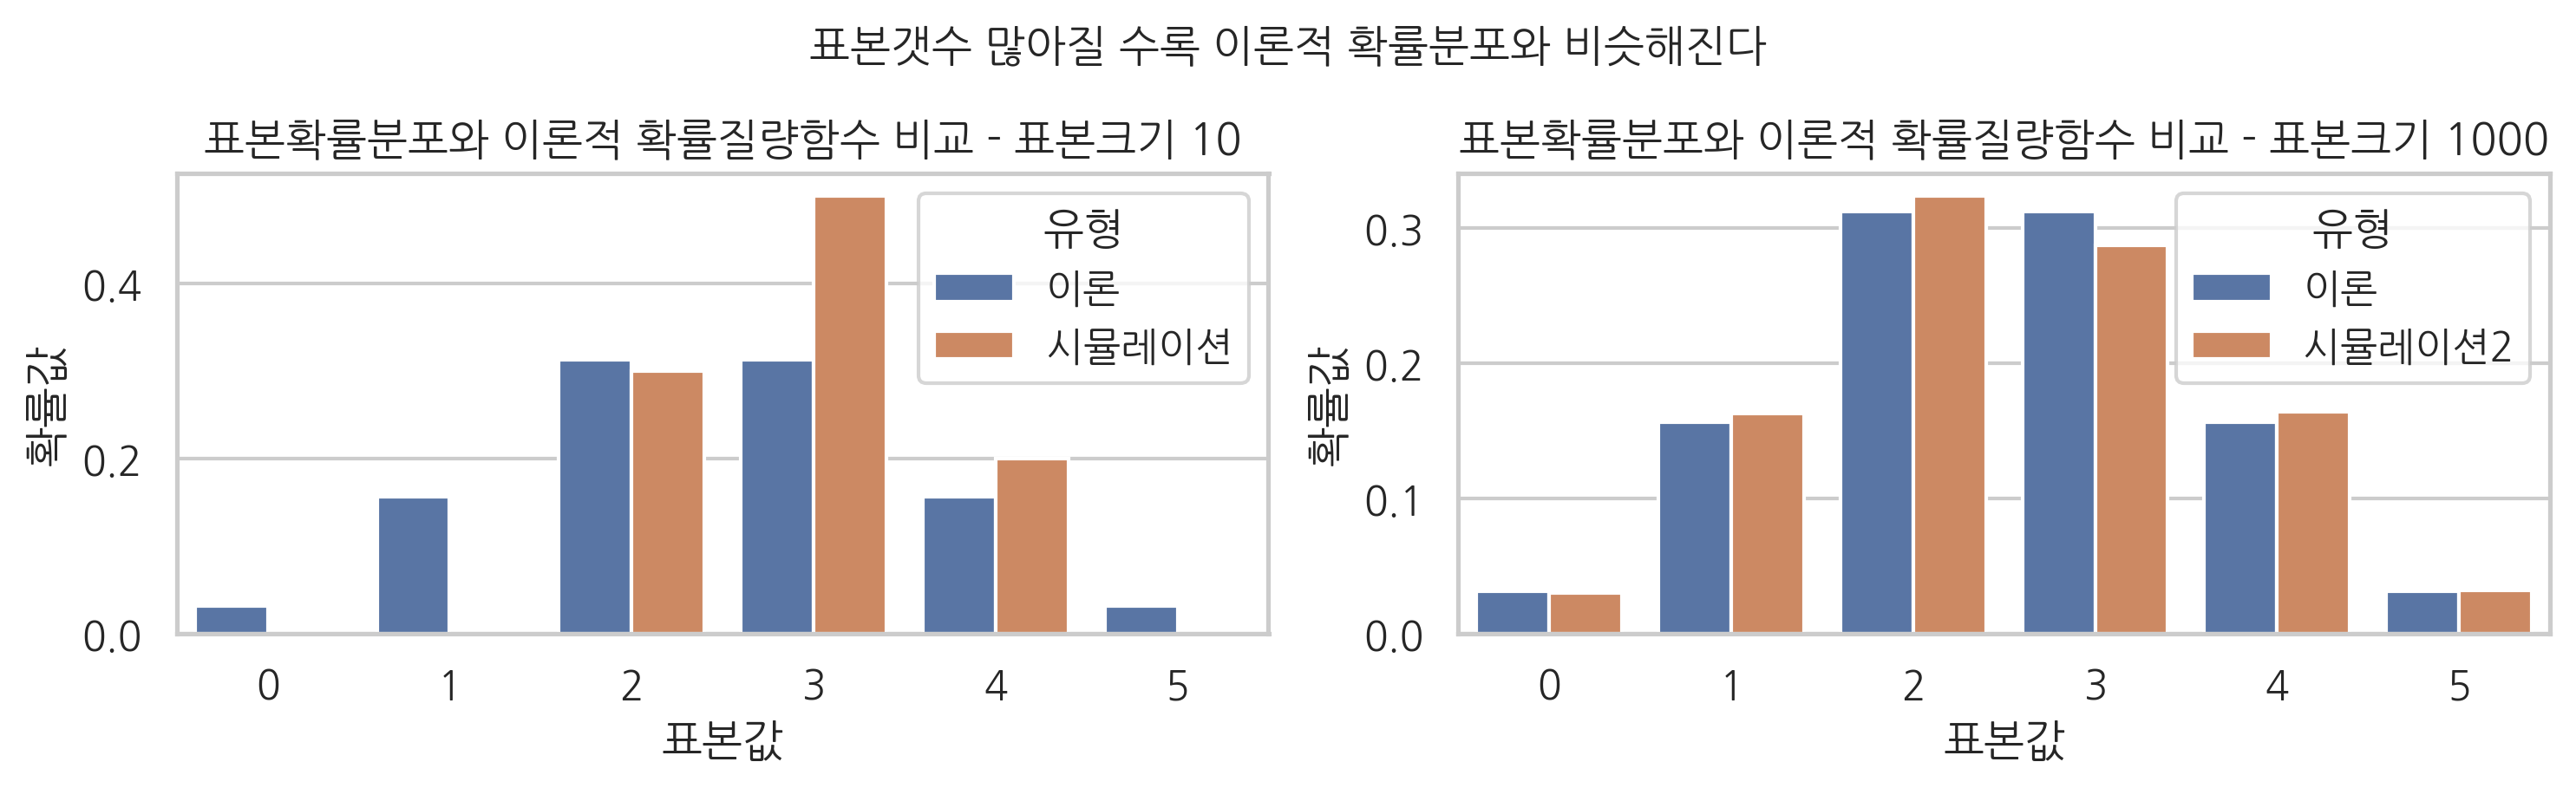

In [69]:
df2 = df.stack().reset_index()
df2.columns=['표본값','유형','확률값']
df2.head()

plt.figure(figsize=(10,5))
plt.subplot(221)
sns.barplot(x='표본값',y='확률값',hue='유형', data=df2)
plt.title('표본확률분포와 이론적 확률질량함수 비교 - 표본크기 10')

plt.subplot(222)
sample_2 = rv.rvs(1000, random_state=0)
p_2 = np.bincount(sample_2, minlength=6)/float(len(sample_2)) #표본확률분포

df3 = pd.DataFrame({
    '이론' : pmf,
    '시뮬레이션2' : p_2
},index=np.arange(6))

df4 = df3.stack().reset_index()
df4.columns=['표본값','유형','확률값']
sns.barplot(x='표본값',y='확률값',hue='유형',data=df4)
plt.title('표본확률분포와 이론적 확률질량함수 비교 - 표본크기 1000')
plt.suptitle('표본갯수 많아질 수록 이론적 확률분포와 비슷해진다')
plt.tight_layout()
plt.show()

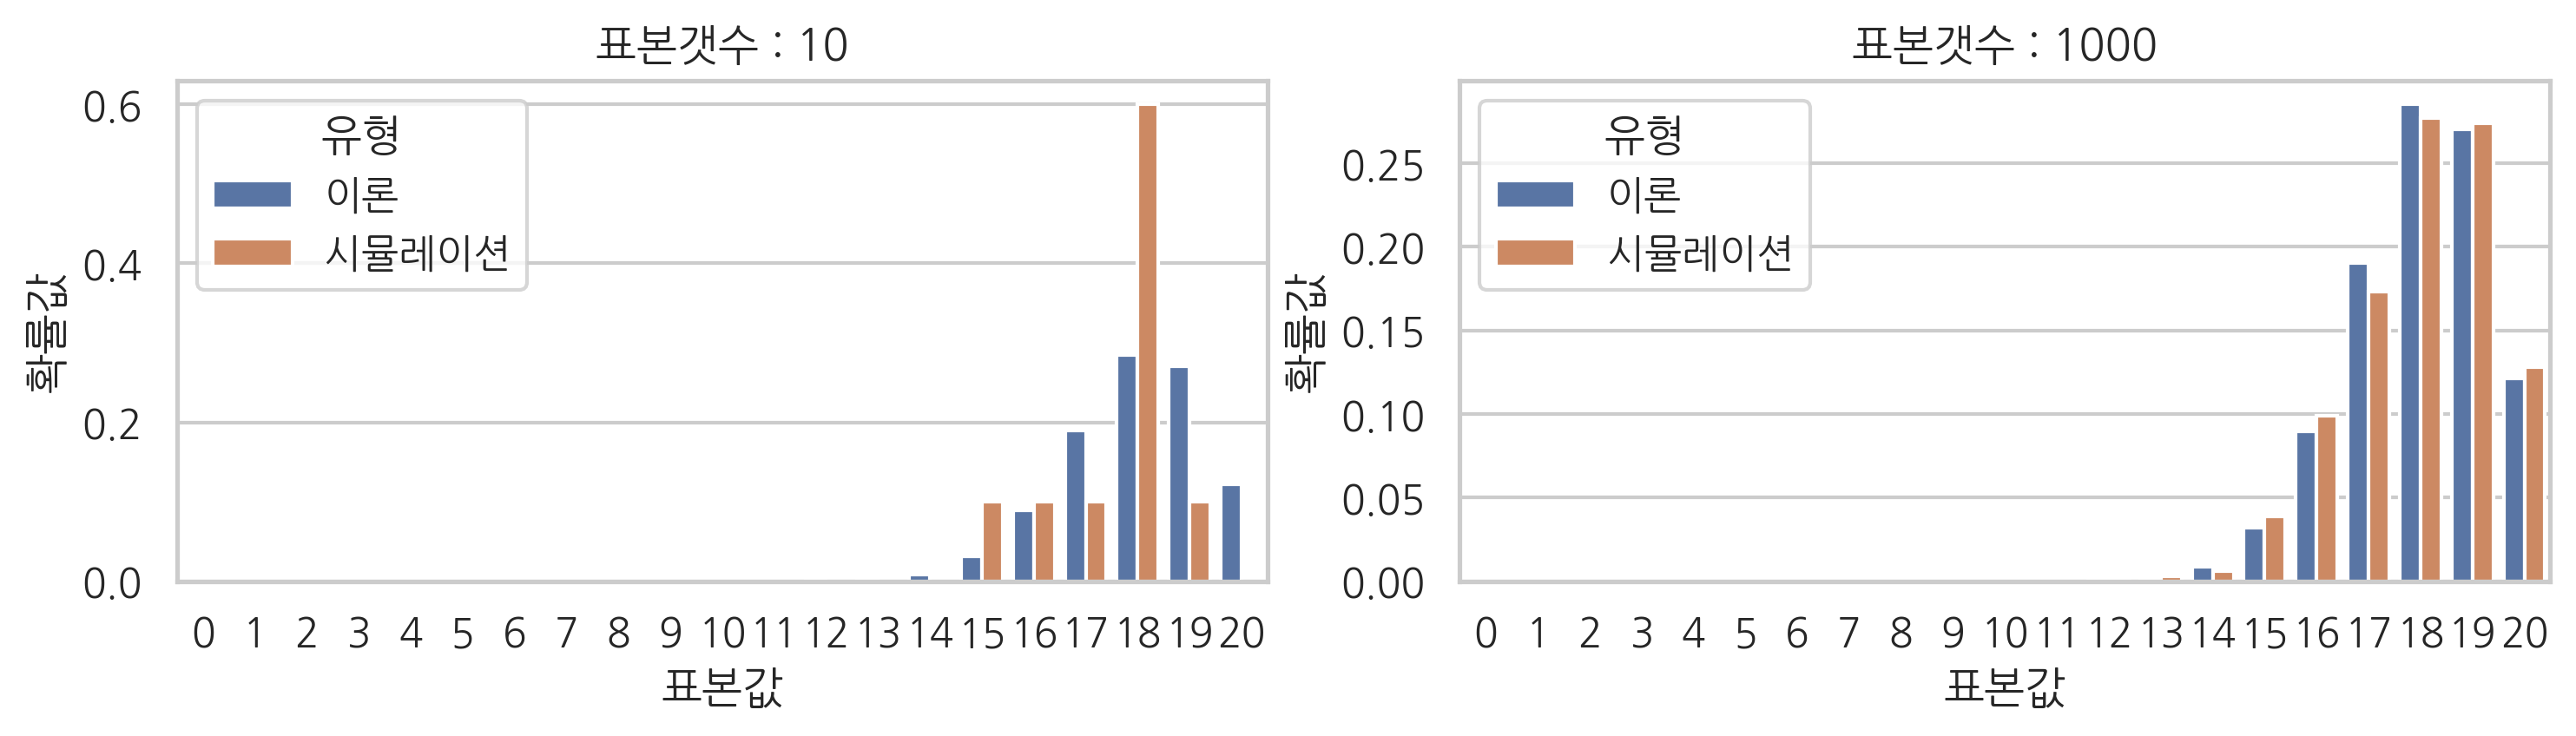

In [23]:
#2. 
def make_binom(n, mu, simul) : 
    rv2 = sp.stats.binom(n,mu)
    pmf2 = rv2.pmf(np.arange(n+1)) #이론적 확률질량함수

    sample_2 = rv2.rvs(simul, random_state=0) #표본 무작위 추출, 시뮬레이션 10번
    p_2 = np.bincount(sample_2, minlength=(n+1))/float(len(sample_2)) #표본확률분포
    
    df6 = pd.DataFrame({
        '이론' : pmf2,
        '시뮬레이션' : p_2
    },index=np.arange(n+1))
    
    df7 = df6.stack().reset_index()
    df7.rename(mapper={'level_0' : '표본값','level_1':'유형',0:'확률값'},inplace=True, axis=1)
    
    sns.barplot(x='표본값',y='확률값',hue='유형',data=df7)
    plt.title('표본갯수 : {}'.format(simul))
    

plt.figure(figsize=(10,5))
plt.subplot(221)
make_binom(20,0.9,10)

plt.subplot(222)
make_binom(20,0.9,1000)
plt.tight_layout()

plt.show()

In [31]:
xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)
xx_ohe.index=np.arange(1,7)
xx_ohe.values

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [38]:
mu = [0.1, 0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(1,mu)

rv.rvs(100, random_state=0)

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
 

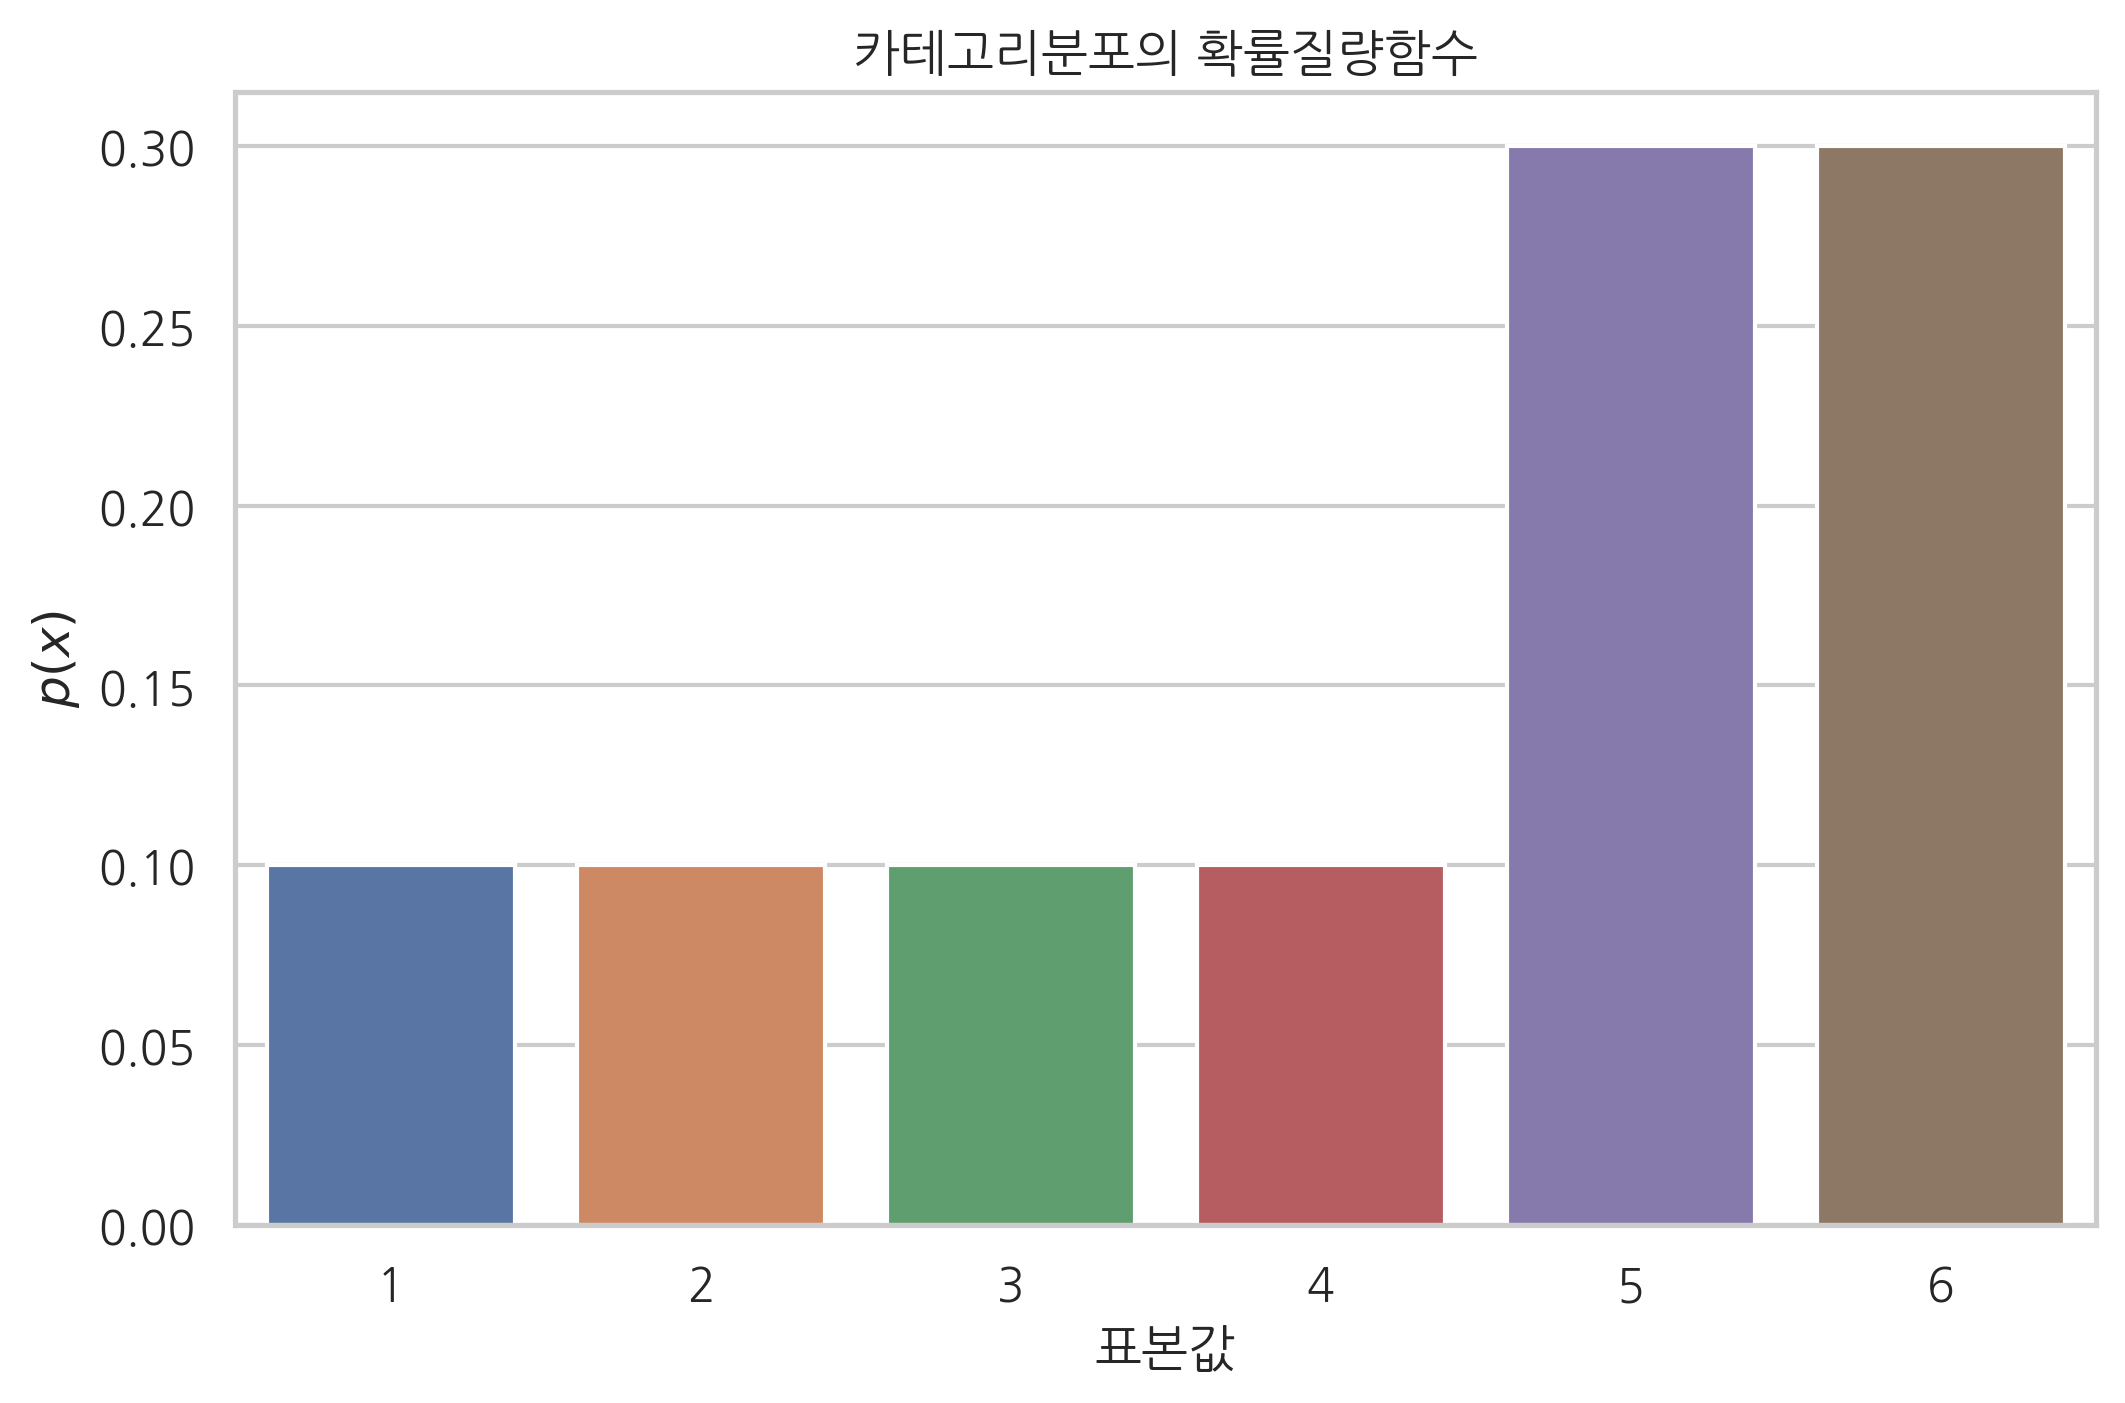

In [8]:
# 카테고리분포 표본 시뮬레이션 & 카테고리분포 확률질량함수 
# 다시해보기 
mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(1,mu) #카테고리분포

xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)

sns.barplot(xx,rv.pmf(xx_ohe.values))
plt.ylabel('$p(x)$')
plt.xlabel('표본값')
plt.title('카테고리분포의 확률질량함수')
plt.show()

In [12]:
X = rv.rvs(100,random_state=1)
X[:5]

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0]])

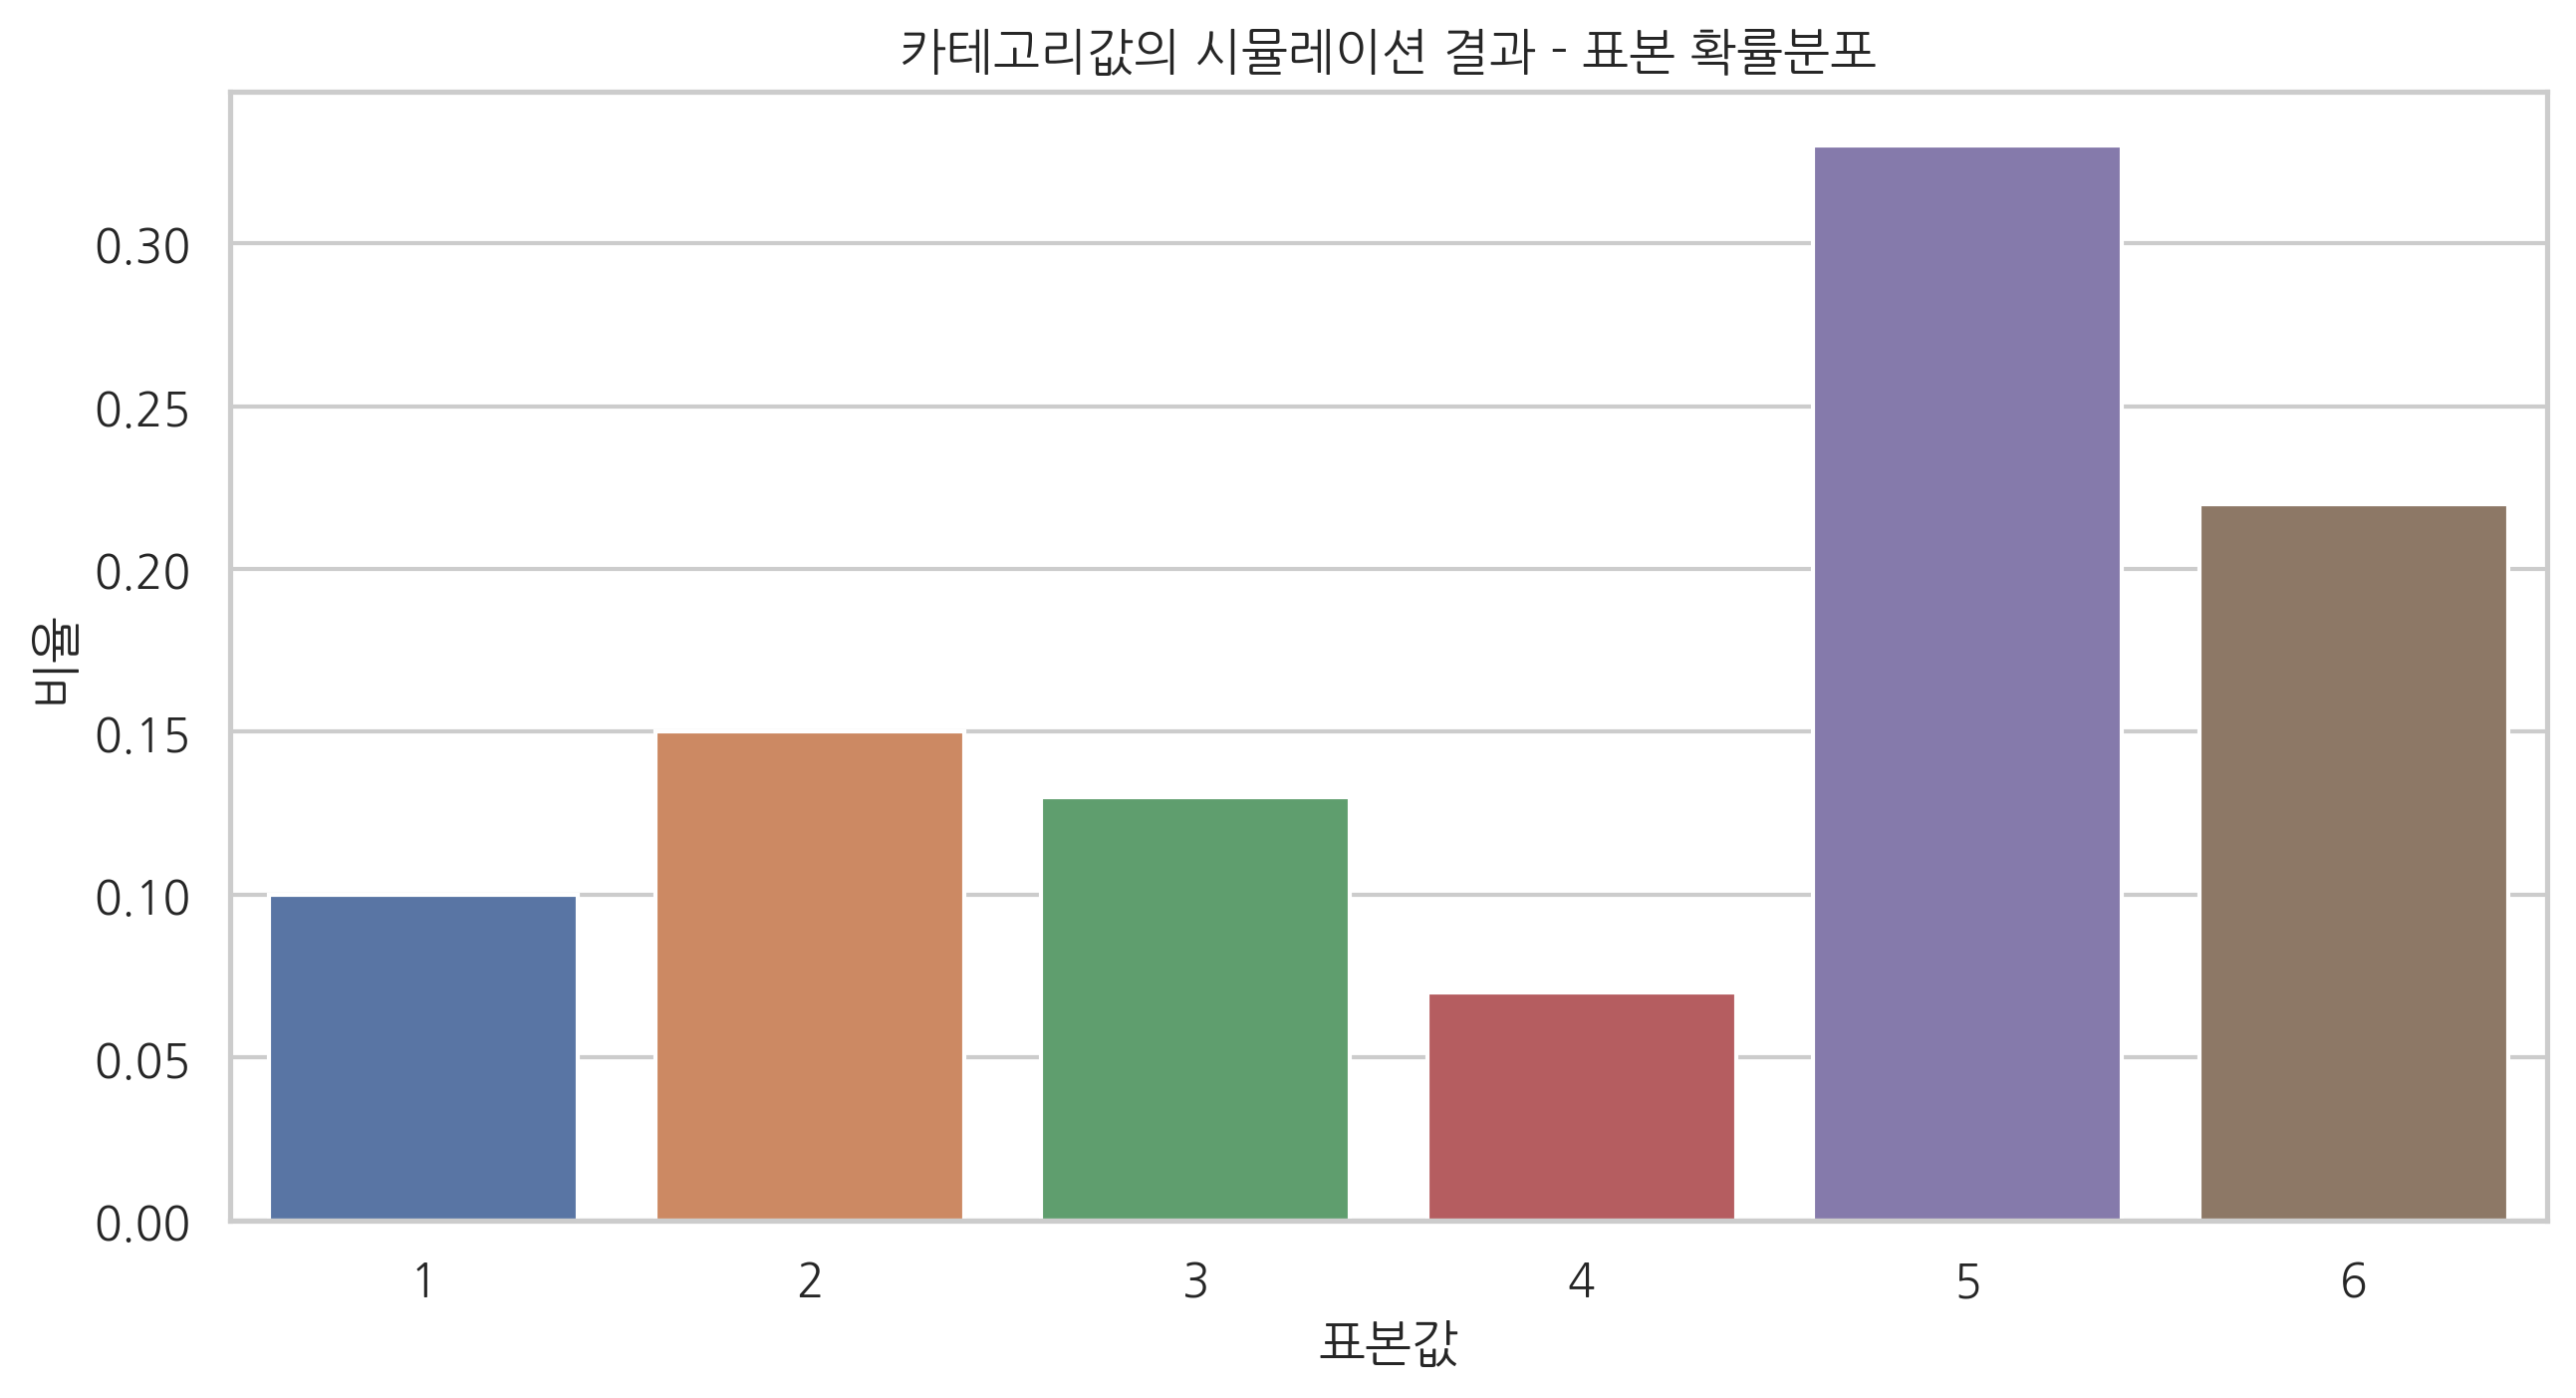

In [20]:
# 표본값 100개 생성하는 시뮬레이션 결과 - 표본 확률분포
y = X.sum(axis=0)/len(X) #표본 확률분포
plt.figure(figsize=(10,5))
sns.barplot(np.arange(1,7),y)
plt.title('카테고리값의 시뮬레이션 결과 - 표본 확률분포')
plt.xlabel('표본값')
plt.ylabel('비율')
plt.show()

In [104]:
mu = [0.1,0.1,0.1,0.1,0.3,0.3]
rv = sp.stats.multinomial(1,mu)
xx = np.arange(1,7)
xx_ohe = pd.get_dummies(xx)

pmf = rv.pmf(xx_ohe.values) #확률질량함수

sample = rv.rvs(100,random_state=1)
sample_p = sample.sum(axis=0)/float(len(sample)) #표본 확률분포

df = pd.DataFrame({
    '이론' : pmf,
    '시뮬레이션' : sample_p
},index=np.arange(1,7))

df2 = df.stack().reset_index()
df2.columns = ['표본값','유형','확률값']
df2

,표본값,유형,확률값
0,1,이론,0.10
1,1,시뮬레이션,0.10
2,2,이론,0.10
3,2,시뮬레이션,0.15
4,3,이론,0.10
5,3,시뮬레이션,0.13
6,4,이론,0.10
7,4,시뮬레이션,0.07
8,5,이론,0.30
9,5,시뮬레이션,0.33


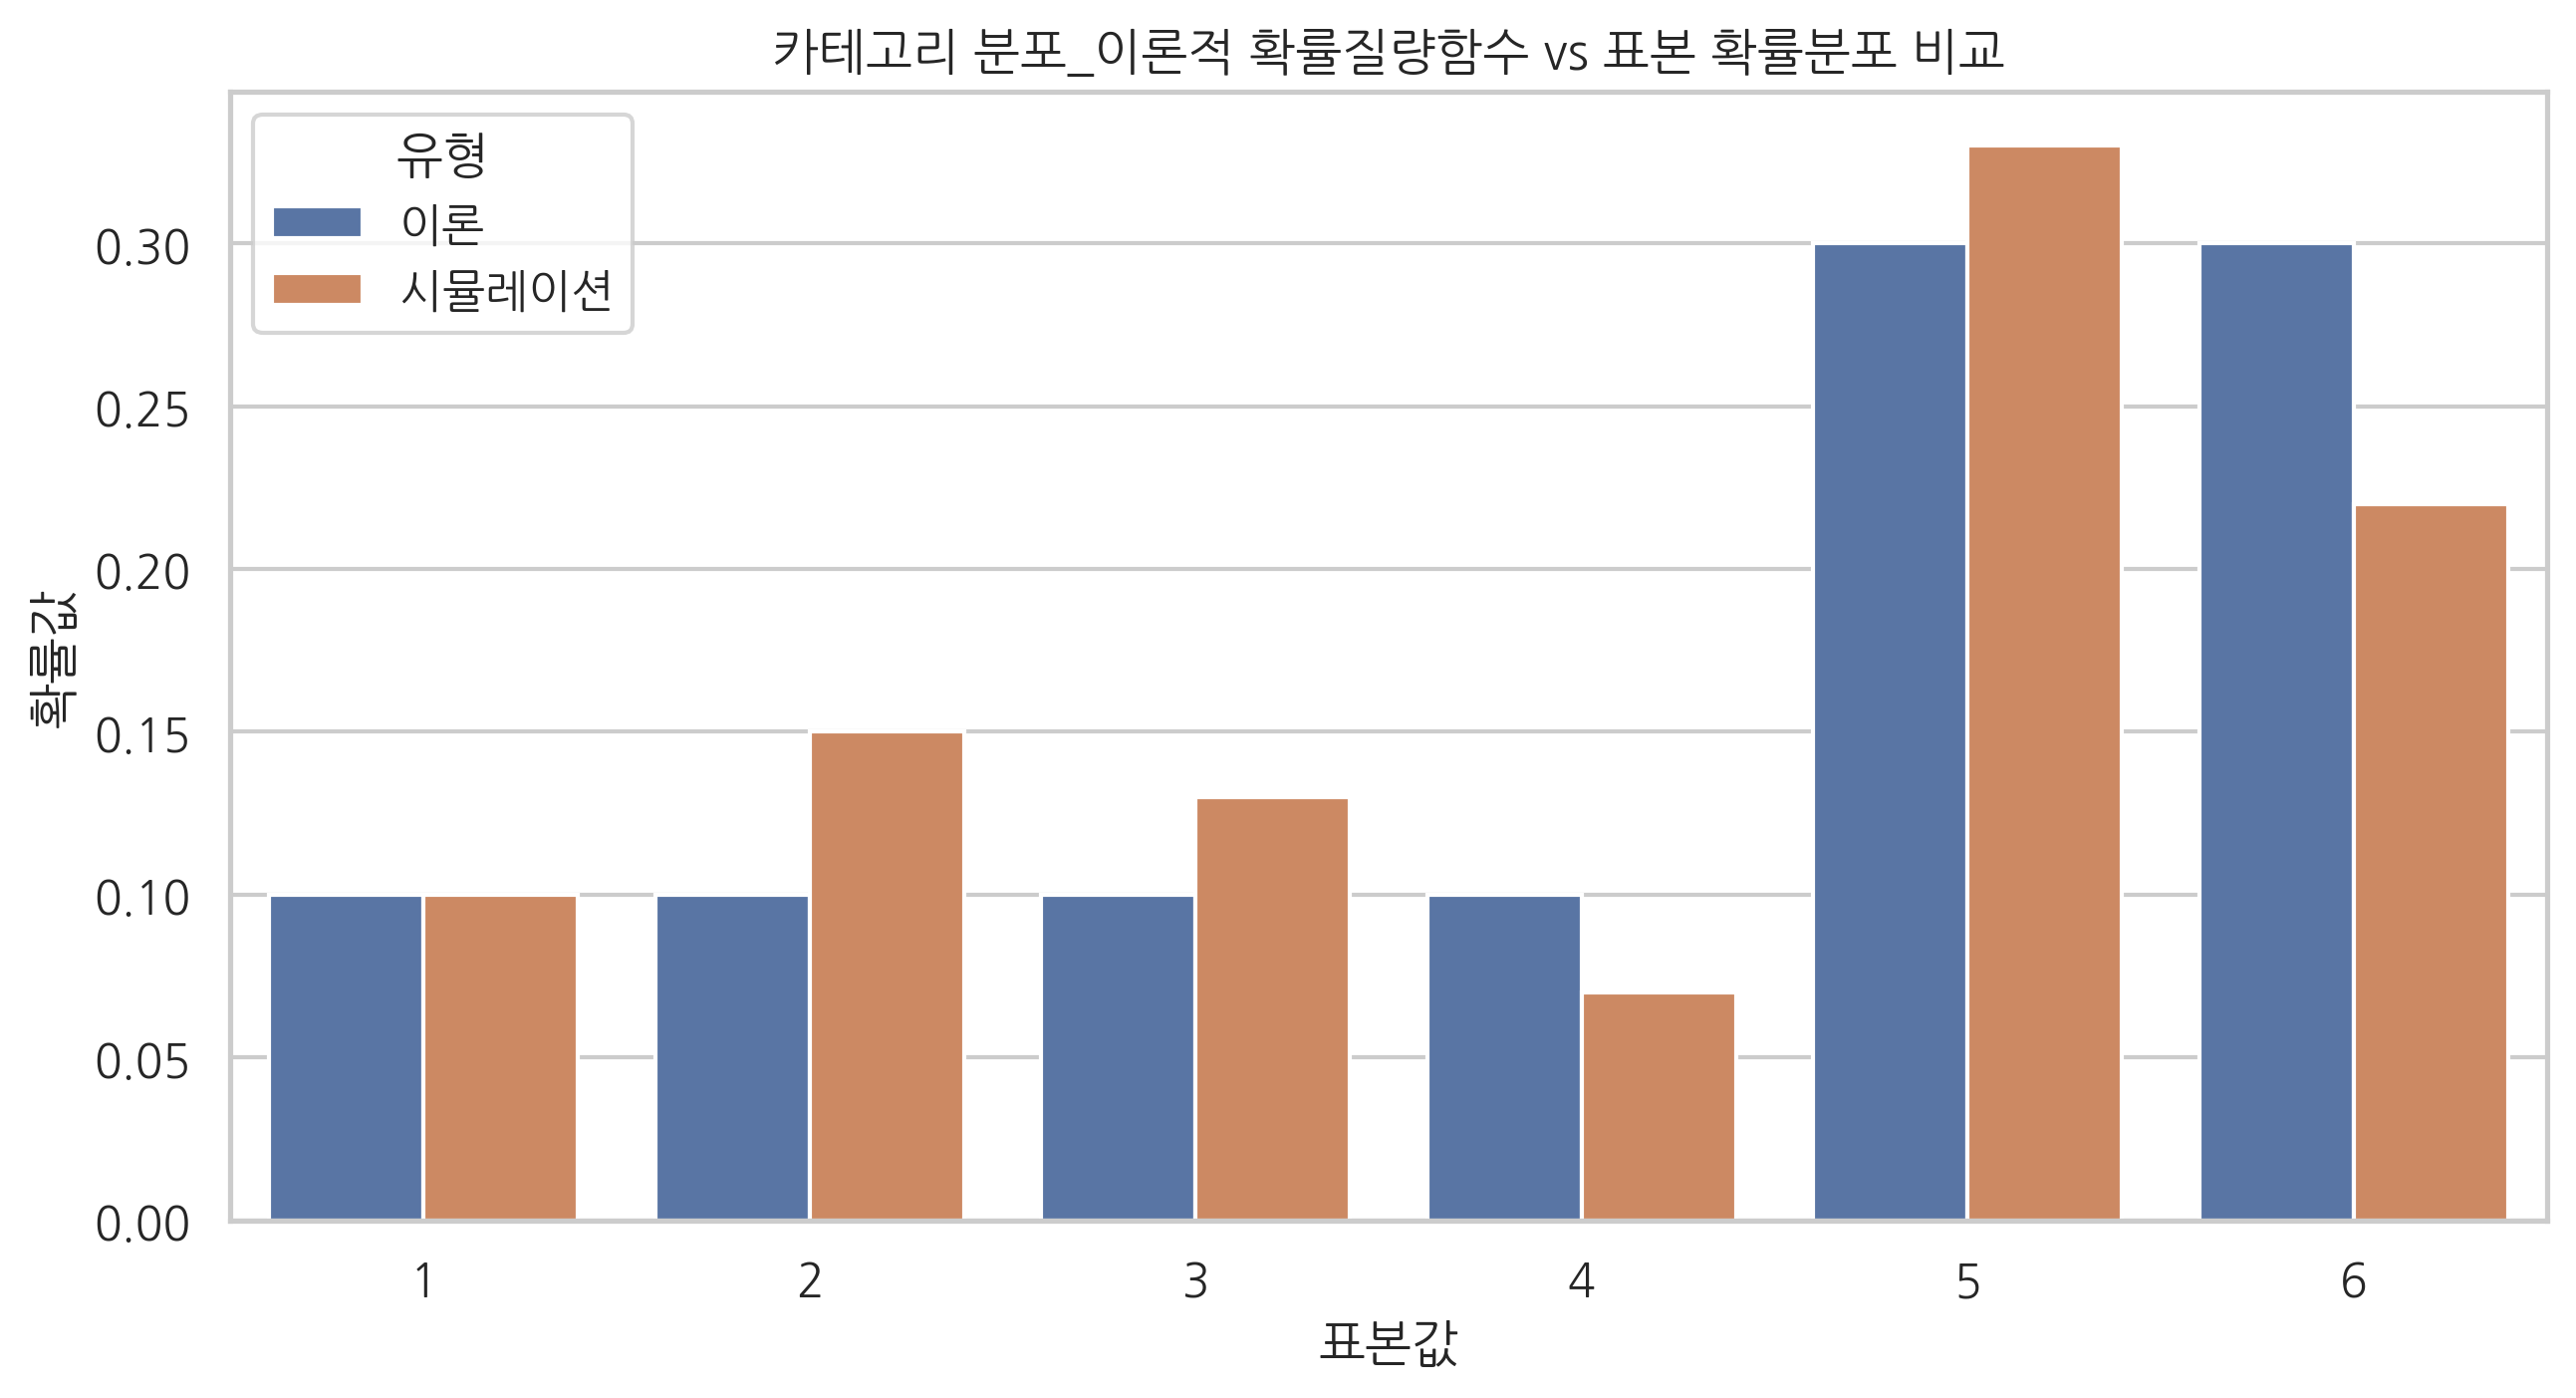

In [110]:
df2.pivot('표본값','유형','확률값')

plt.figure(figsize=(10,5))
sns.barplot(x='표본값',y='확률값',hue='유형',data=df2)
plt.title('카테고리 분포_이론적 확률질량함수 vs 표본 확률분포 비교')
plt.xlabel('표본값')
plt.show()

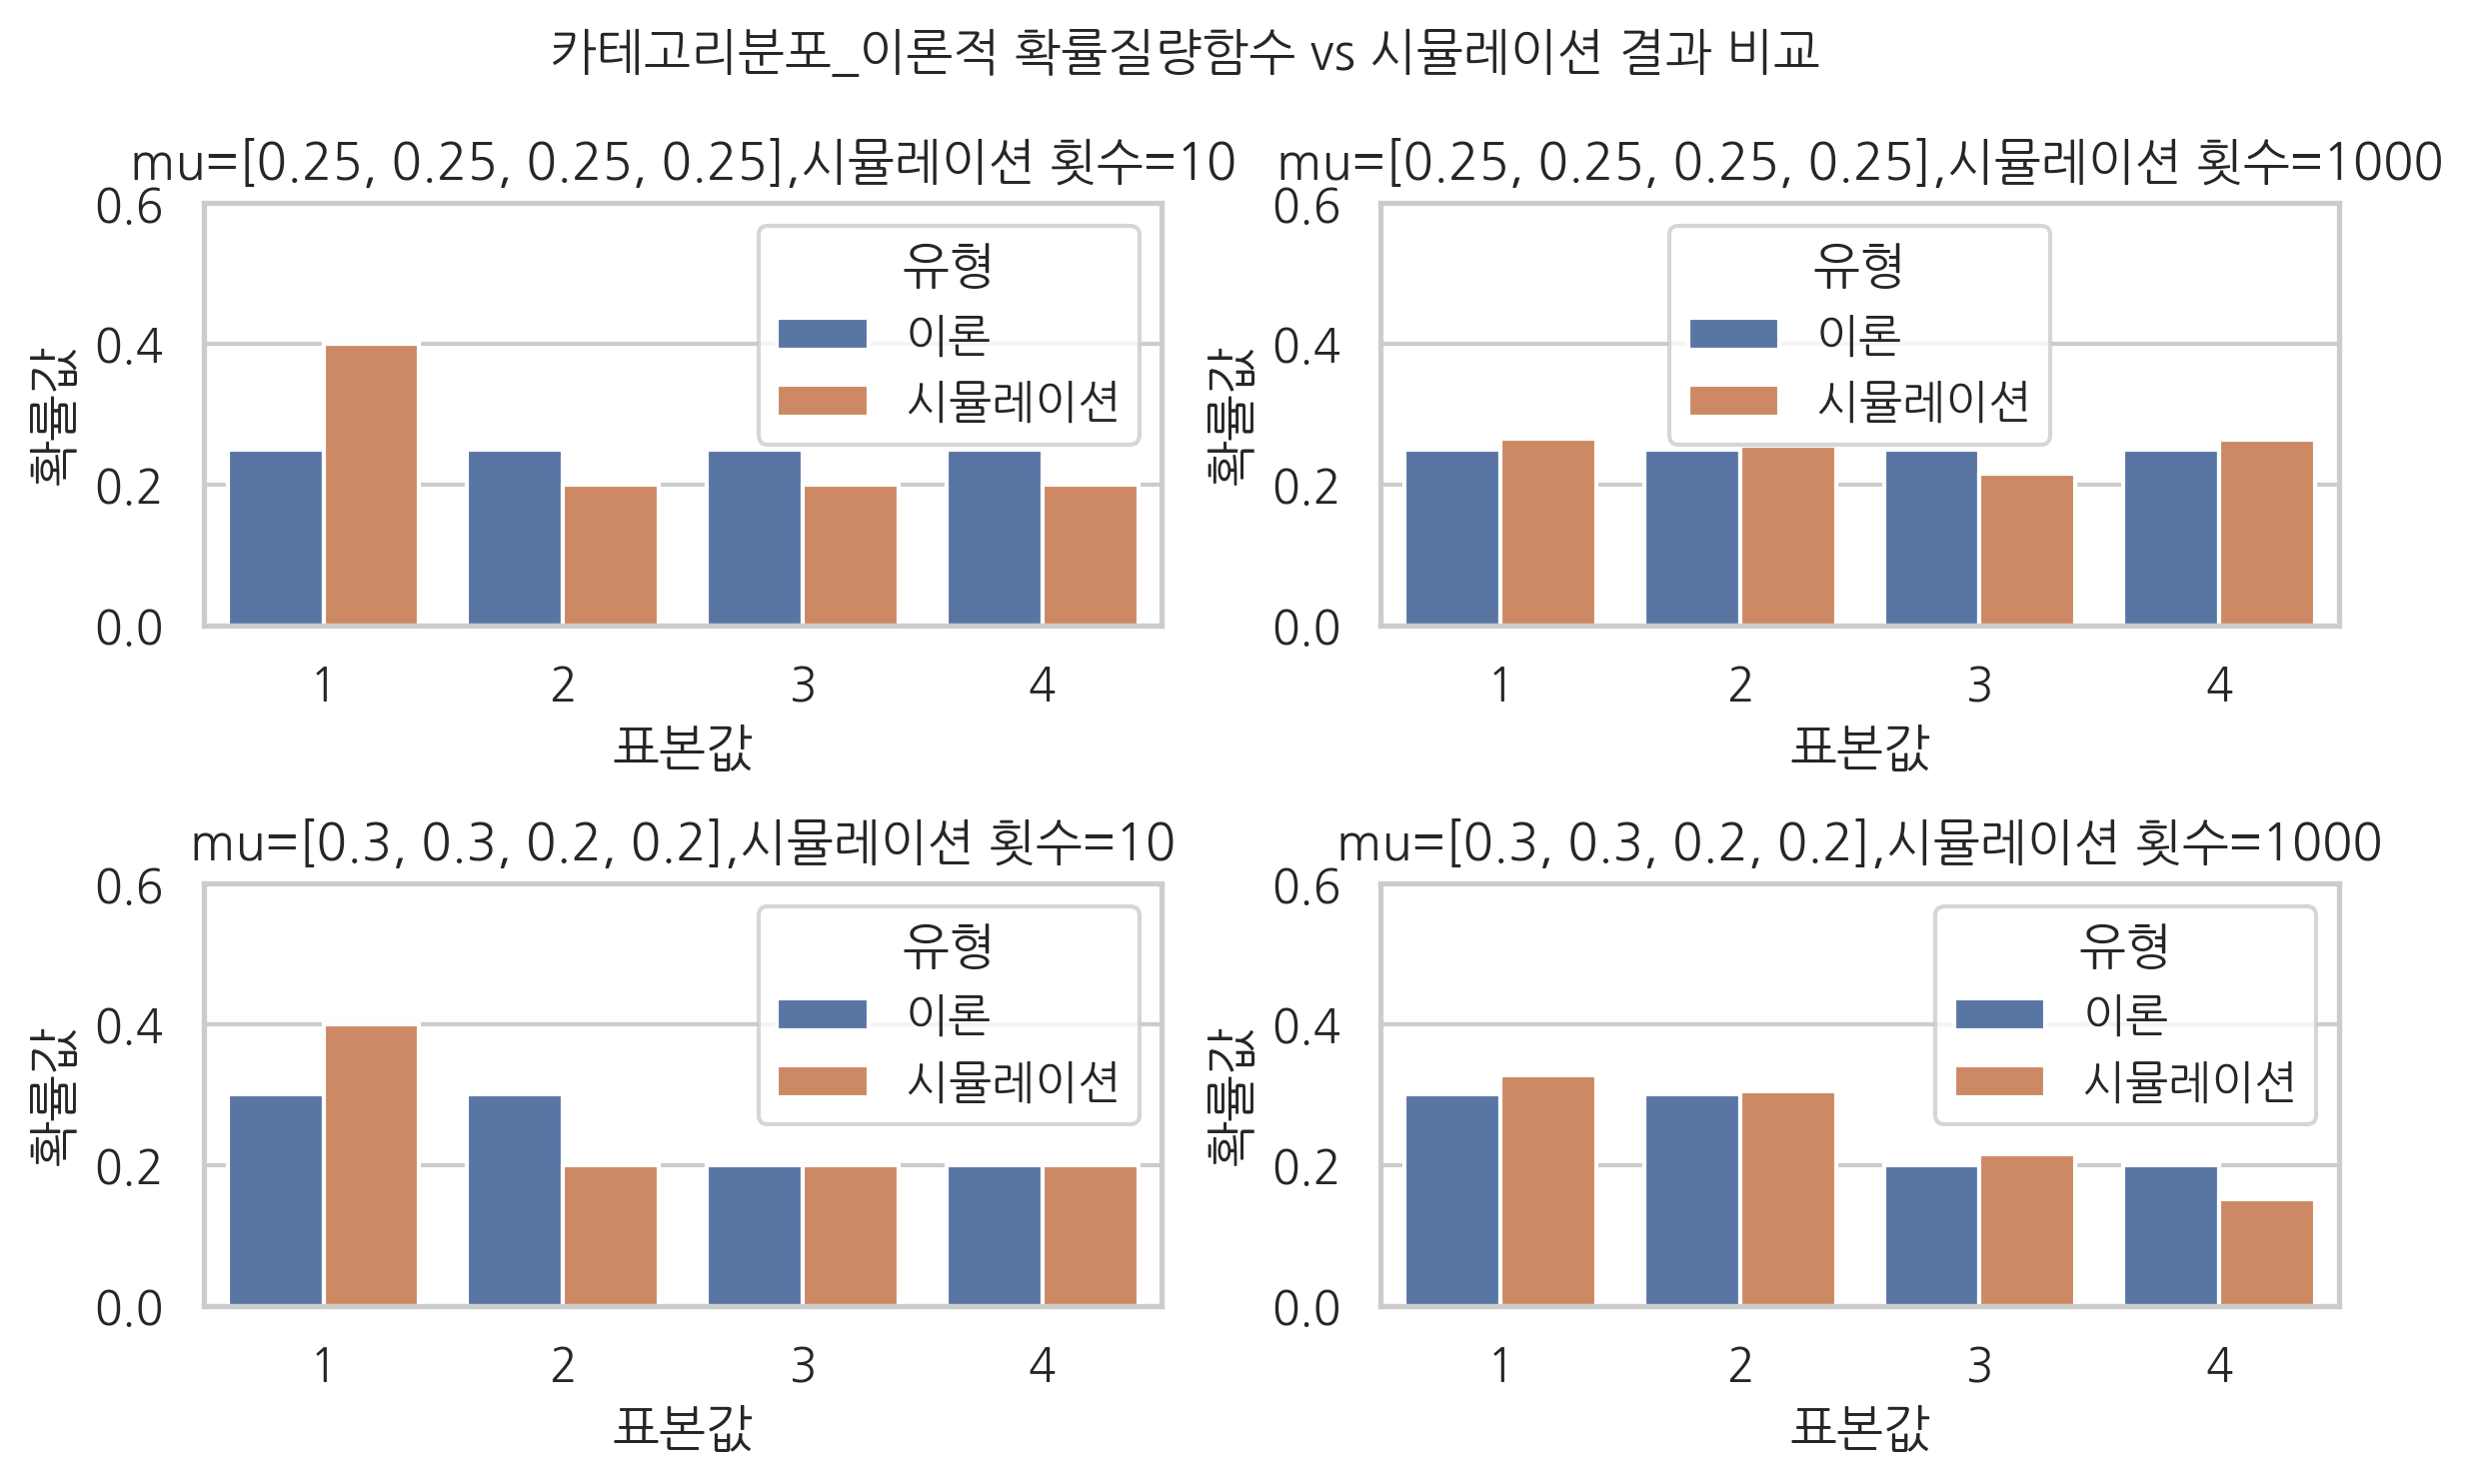

In [135]:
#8.3.2 연습문제 
def cat(mu, simul) : 
    rv = sp.stats.multinomial(1,mu) #카테고리 확률분포

    # 표본갯수 10인 경우
    xx = np.arange(1,5)
    xx_ohe = pd.get_dummies(xx) # 더미변수 얻었다.

    pmf = rv.pmf(xx_ohe.values) #확률질량함수
    sample = rv.rvs(simul,random_state=0)
    y = sample.sum(axis=0)/float(len(sample)) #표본 확률분포
    
    df3 = pd.DataFrame({
        '이론' : pmf,
        '시뮬레이션' : y
    },index=np.arange(1,5))
    
    df4 = df3.stack().reset_index()
    df4.columns=['표본값','유형','확률값']
    df4.pivot('표본값','유형','확률값')
    sns.barplot(x='표본값',y='확률값',hue='유형',data=df4)
    plt.title('mu={},시뮬레이션 횟수={}'.format(mu,simul))
    plt.ylim(0,0.6)
    
plt.subplot(221)
mu = [0.25]*4
cat(mu, 10)
plt.subplot(222)
cat(mu,1000)

plt.subplot(223)
mu2 = [0.3,0.3,0.2,0.2]
cat(mu2,10)
plt.subplot(224)
cat(mu2,1000)

plt.suptitle('카테고리분포_이론적 확률질량함수 vs 시뮬레이션 결과 비교')
plt.tight_layout()
plt.show()

In [142]:
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['품종'] = pd.Series(iris.target, dtype='category')
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),품종
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


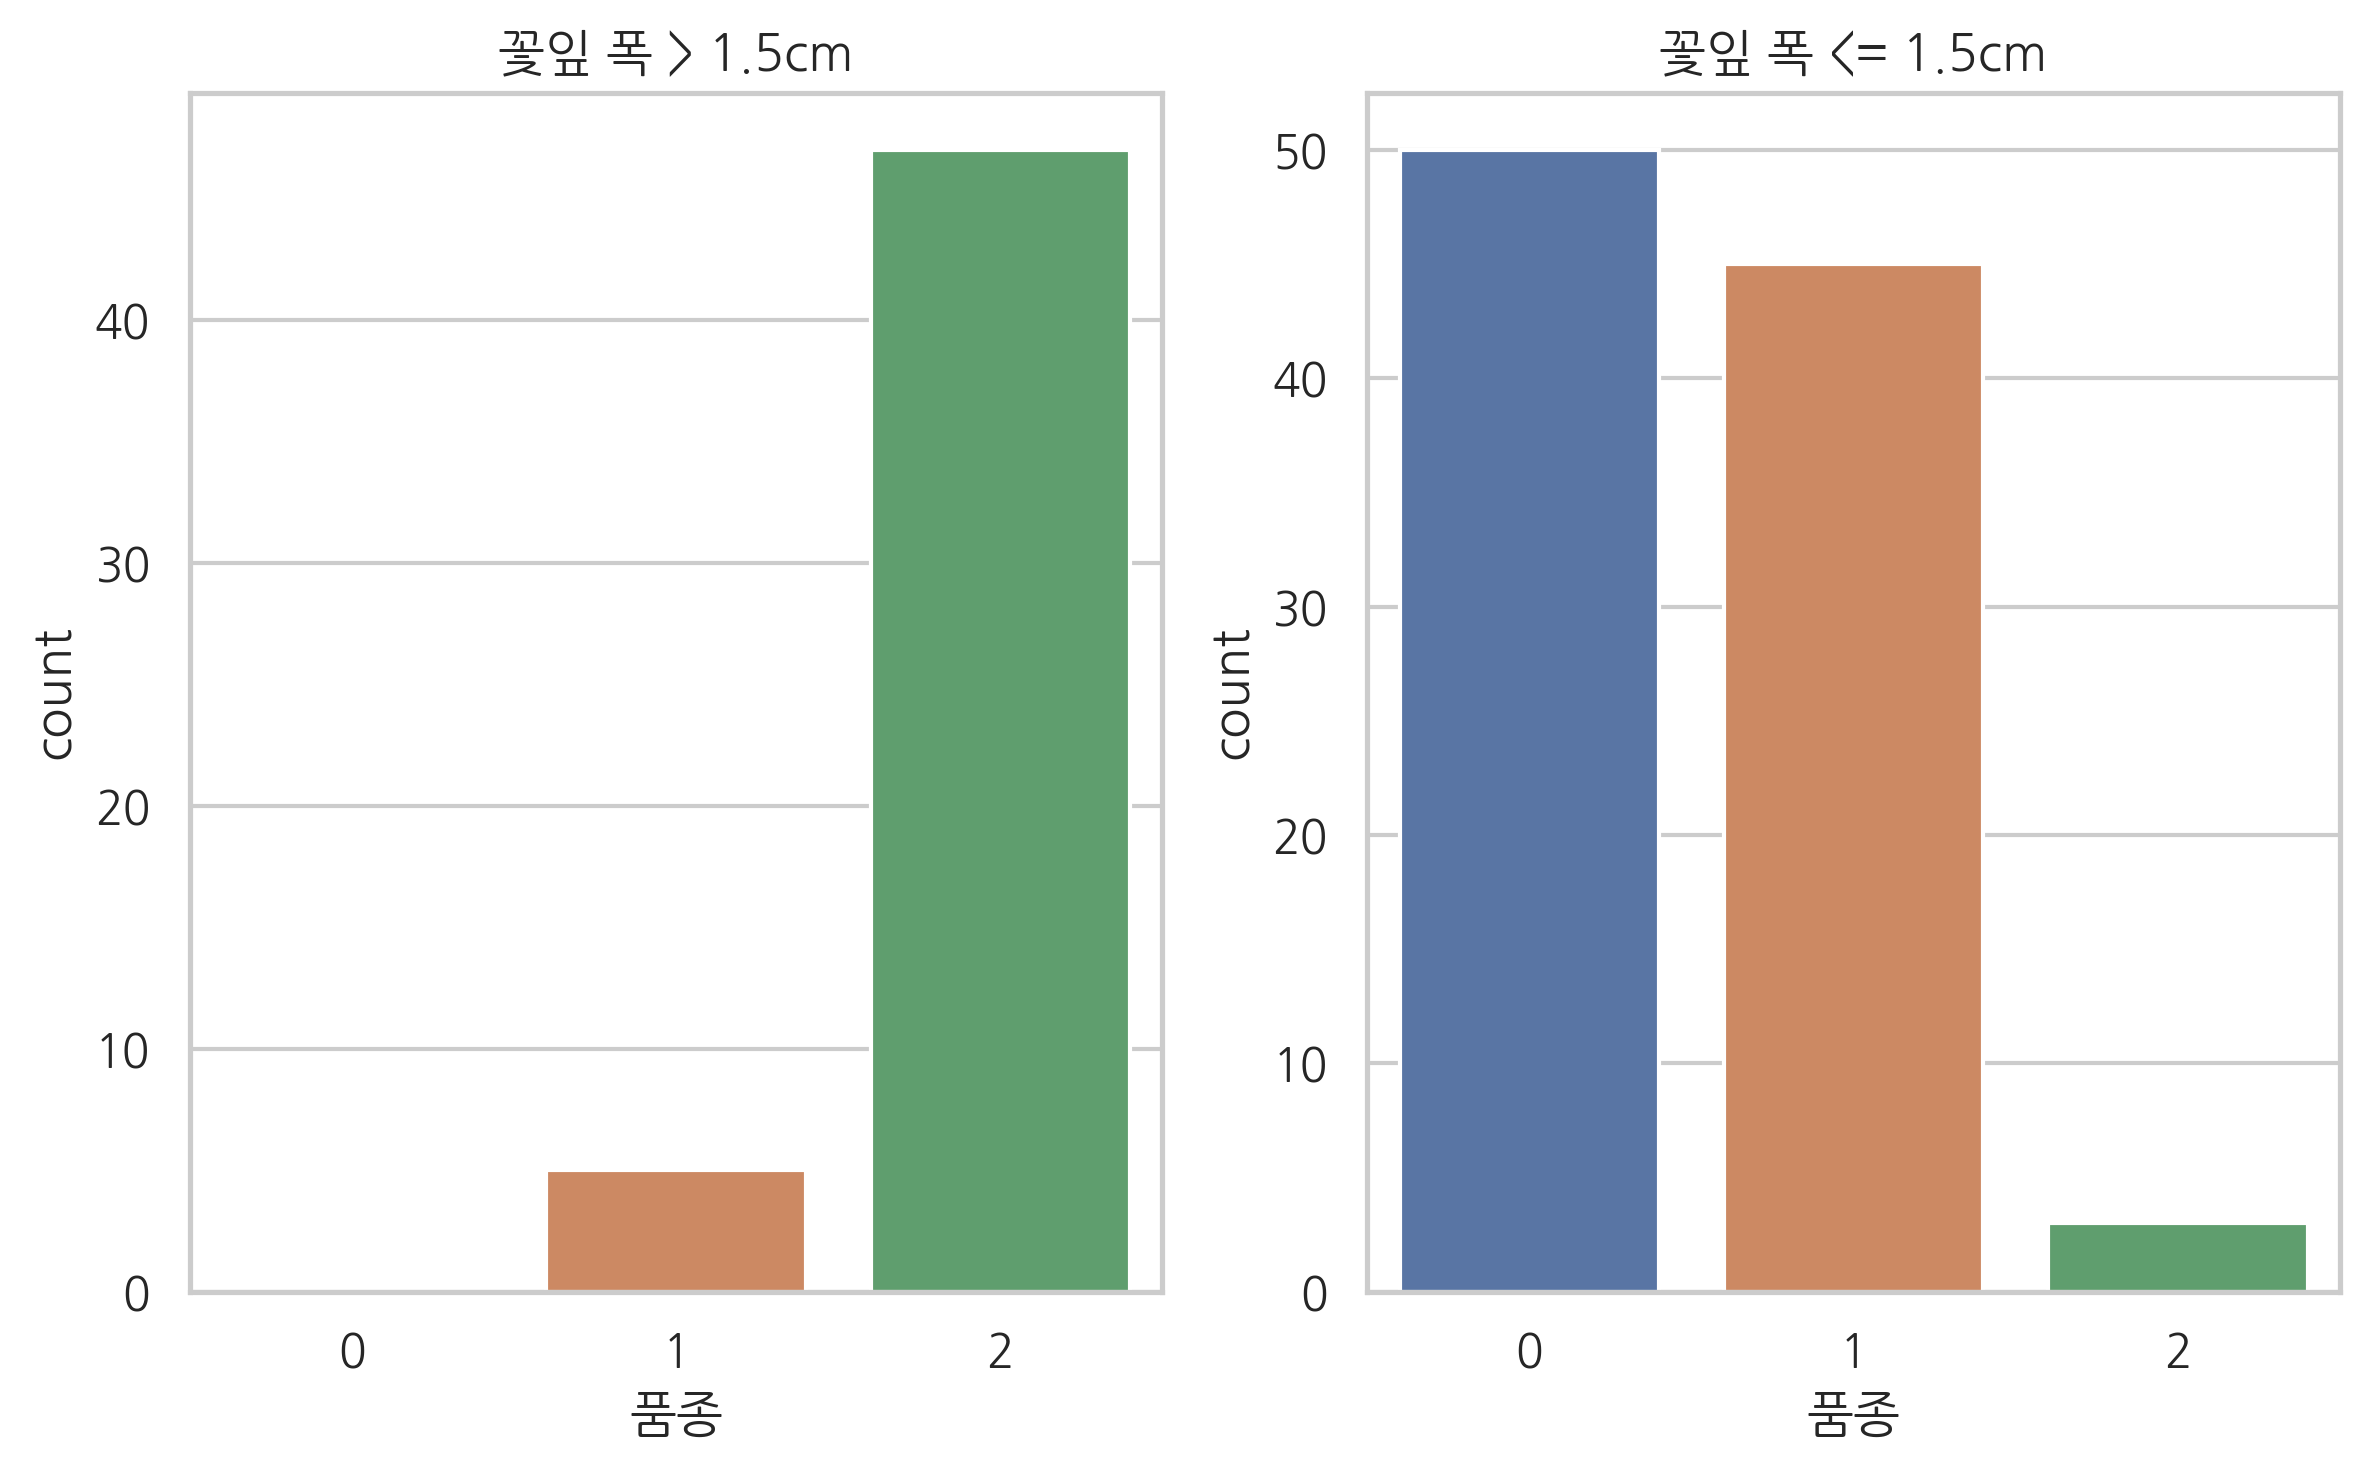

In [157]:
df1 = df[df['petal width (cm)']>1.5]
df2 = df[df['petal width (cm)']<=1.5] #꽃잎 폭 1.5보다 기냐, 짧냐를 기준으로 다변수확률변수의 표본들(1개 벡터) 나눴다.

fig,ax = plt.subplots(1,2)
sns.countplot(x='품종',data=df1,ax=ax[0]).set_title('꽃잎 폭 > 1.5cm')
sns.countplot(x='품종',data=df2,ax=ax[1]).set_title('꽃잎 폭 <= 1.5cm')
plt.tight_layout()
plt.show()

# 품종 2의 특징은 꽃잎 폭이 1.5cm보다 크다'임을 알 수 있다. 
# 품종 0과 1의 특징은 꽃잎 폭이 1.5보다 같거나 작다'임을 알 수 있다.

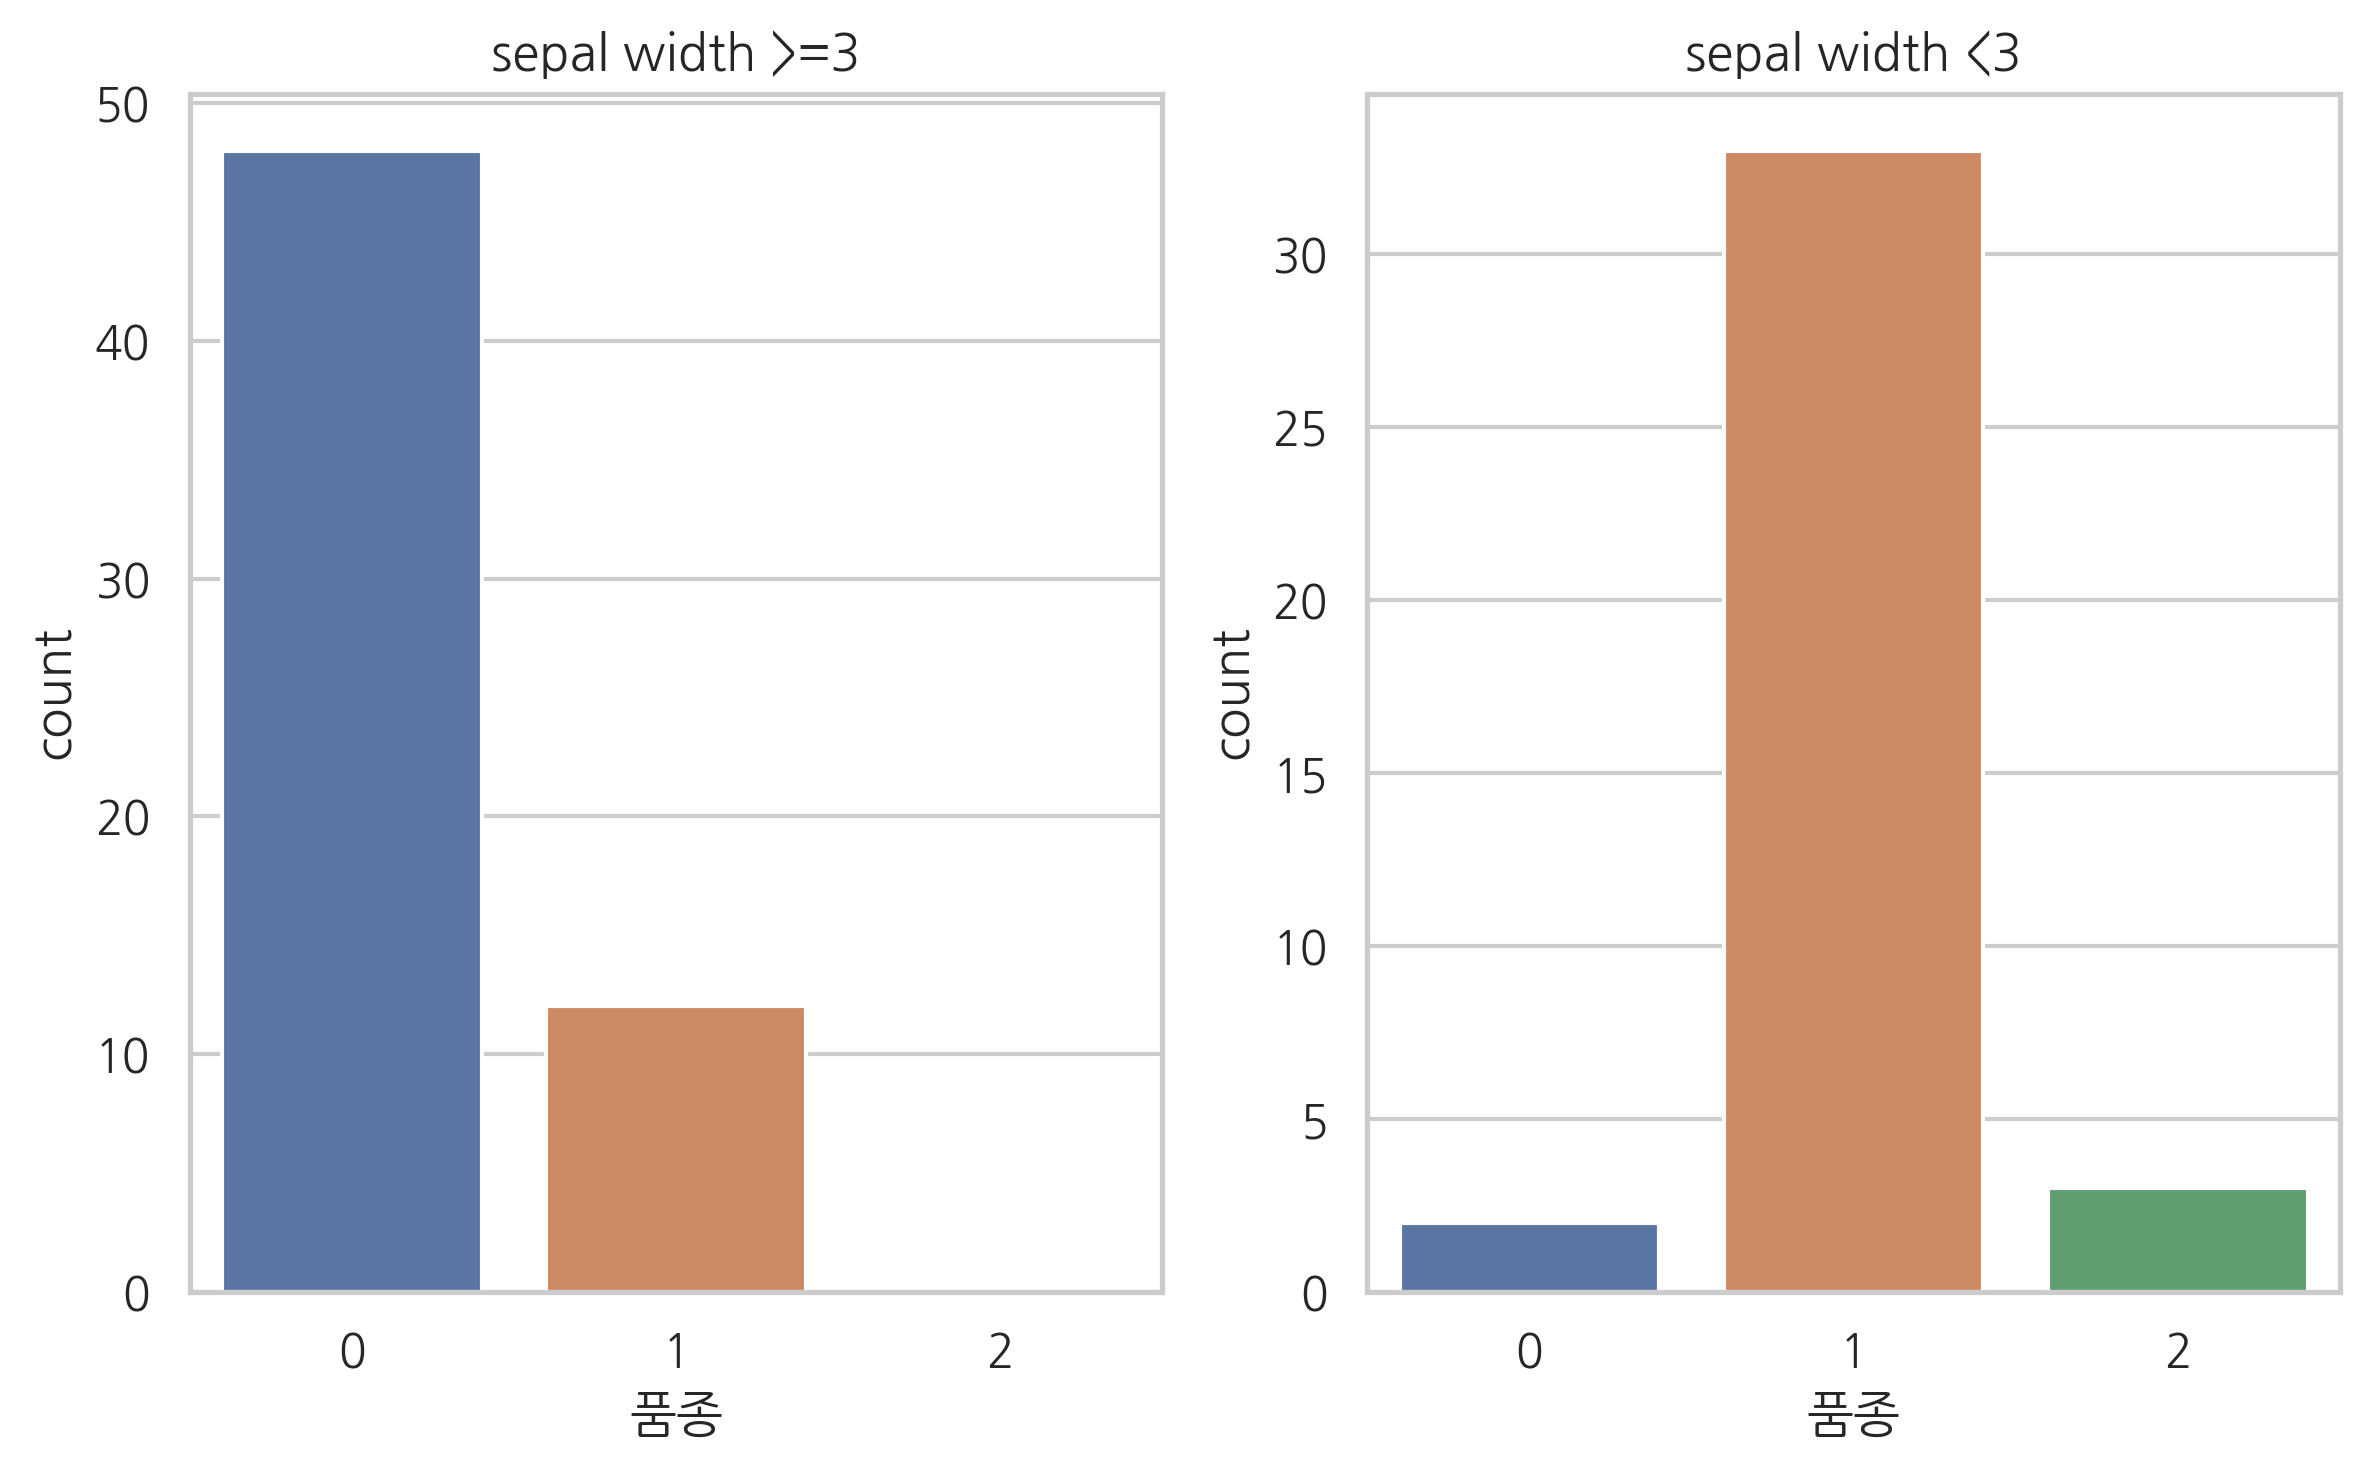

In [166]:
test1 = df2[df2['sepal width (cm)']>=3]
test2 = df2[df2['sepal width (cm)']<3]

fig, ax = plt.subplots(1,2)
sns.countplot(x='품종',data=test1,ax=ax[0]).set_title('sepal width >=3')
sns.countplot(x='품종',data=test2,ax=ax[1]).set_title('sepal width <3')

plt.tight_layout()
plt.show()

# 품종 0의 특징은 꽃잎 폭이 1.5보다 작으면서, sepal width 가 3보다 크거나 같음을 알 수 있다. 
# 품종 1의 특징은 꽃잎 폭이 1.5보다 작으면서, sepal width 가 3보다 작음을 알 수 있다.